In [2]:
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_excel("superstore_data.xls")
furniture = df.loc[df['Category'] == 'Furniture']

In [4]:
furniture['Order Date'].min(),
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [5]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
       'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

furniture.isnull().sum()


Order Date    0
Sales         0
dtype: int64

In [6]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [7]:
y = furniture['Sales'].resample('MS').mean()

In [8]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

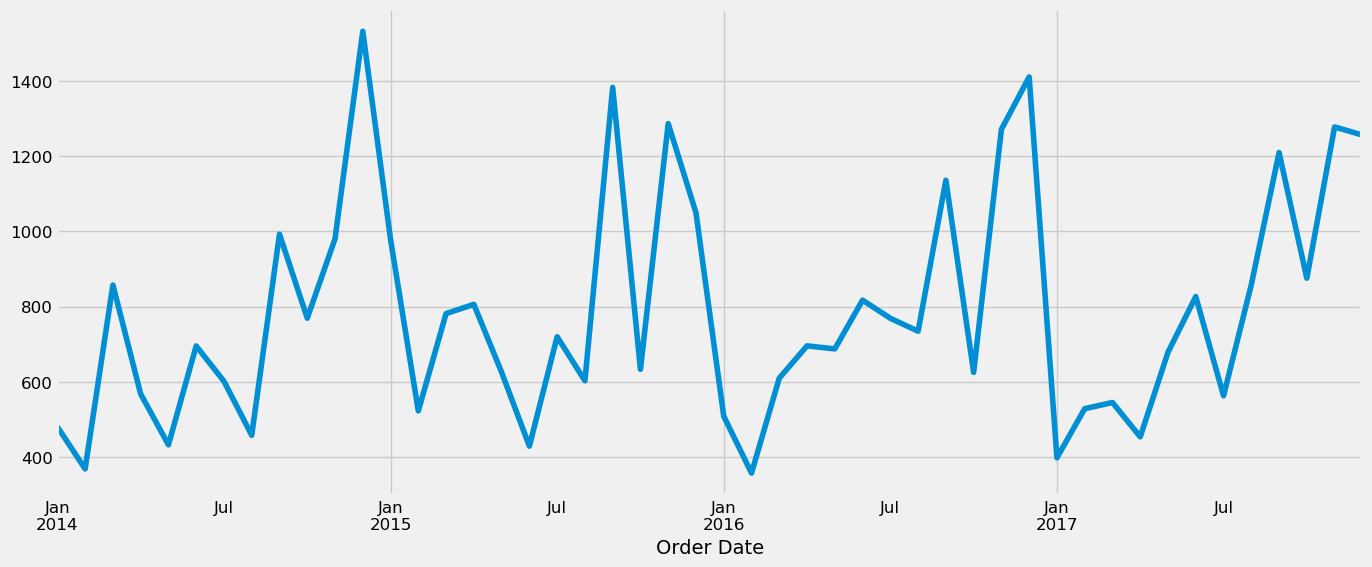

In [9]:
y.plot(figsize=(15,6))
plt.show()

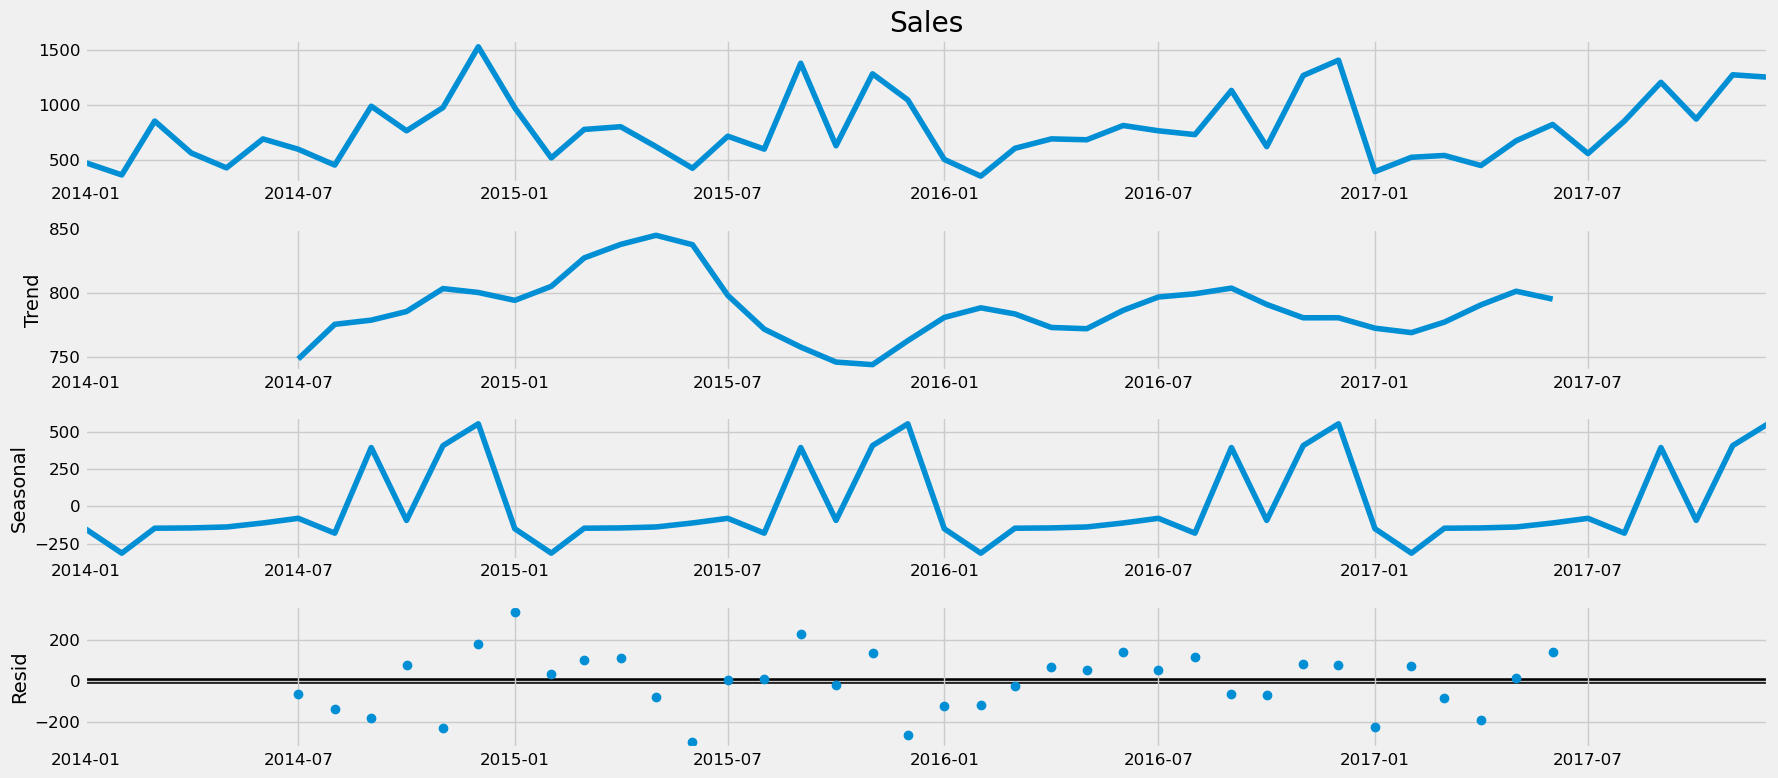

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [11]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinations for seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
for param in pdq:
    for param_s in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_s, enforce_stationarity=False,
                                           enforce_invertibility=False)
            results=model.fit(method='powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_s,results.aic))
            
        except:
            continue

Optimization terminated successfully.
         Current function value: 7.990435
         Iterations: 1
         Function evaluations: 11
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817513097701
Optimization terminated successfully.
         Current function value: 5.955095
         Iterations: 5
         Function evaluations: 276
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:575.6891292358698
Optimization terminated successfully.
         Current function value: 4.955386
         Iterations: 2
         Function evaluations: 35
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170129351673
Optimization terminated successfully.
         Current function value: 3.106982
         Iterations: 2
         Function evaluations: 50
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.270289974385
Optimization terminated successfully.
         Current function value: 5.137828
         Iterations: 1
         Function evaluations: 58
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338
Optimization terminated successfully.
  

ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.34331969229737
Optimization terminated successfully.
         Current function value: 4.943580
         Iterations: 4
         Function evaluations: 168
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5836811639406
Optimization terminated successfully.
         Current function value: 7.469568
         Iterations: 10
         Function evaluations: 1527
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:727.0785184144253
Optimization terminated successfully.
         Current function value: 3.108409
         Iterations: 2
         Function evaluations: 86
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.4072401201314
Optimization terminated successfully.
         Current function value: 2.963301
         Iterations: 4
         Function evaluations: 228
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:294.4768594200013
Optimization terminated successfully.
         Current function value: 6.950535
         Iterations: 1
         Function evaluations: 53
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - A

In [13]:
model = sm.tsa.statespace.SARIMAX(y, order=(0,1,1), seasonal_order=(0,1,1,12), enforce_invertibility = False)
results = model.fit(method='powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 4.968099
         Iterations: 3
         Function evaluations: 111
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0247      0.798     -1.285      0.199      -2.588       0.539
ma.S.L12      -0.7641      0.768     -0.995      0.320      -2.270       0.742
sigma2      3.243e+04   3.26e+04      0.996      0.319   -3.14e+04    9.62e+04


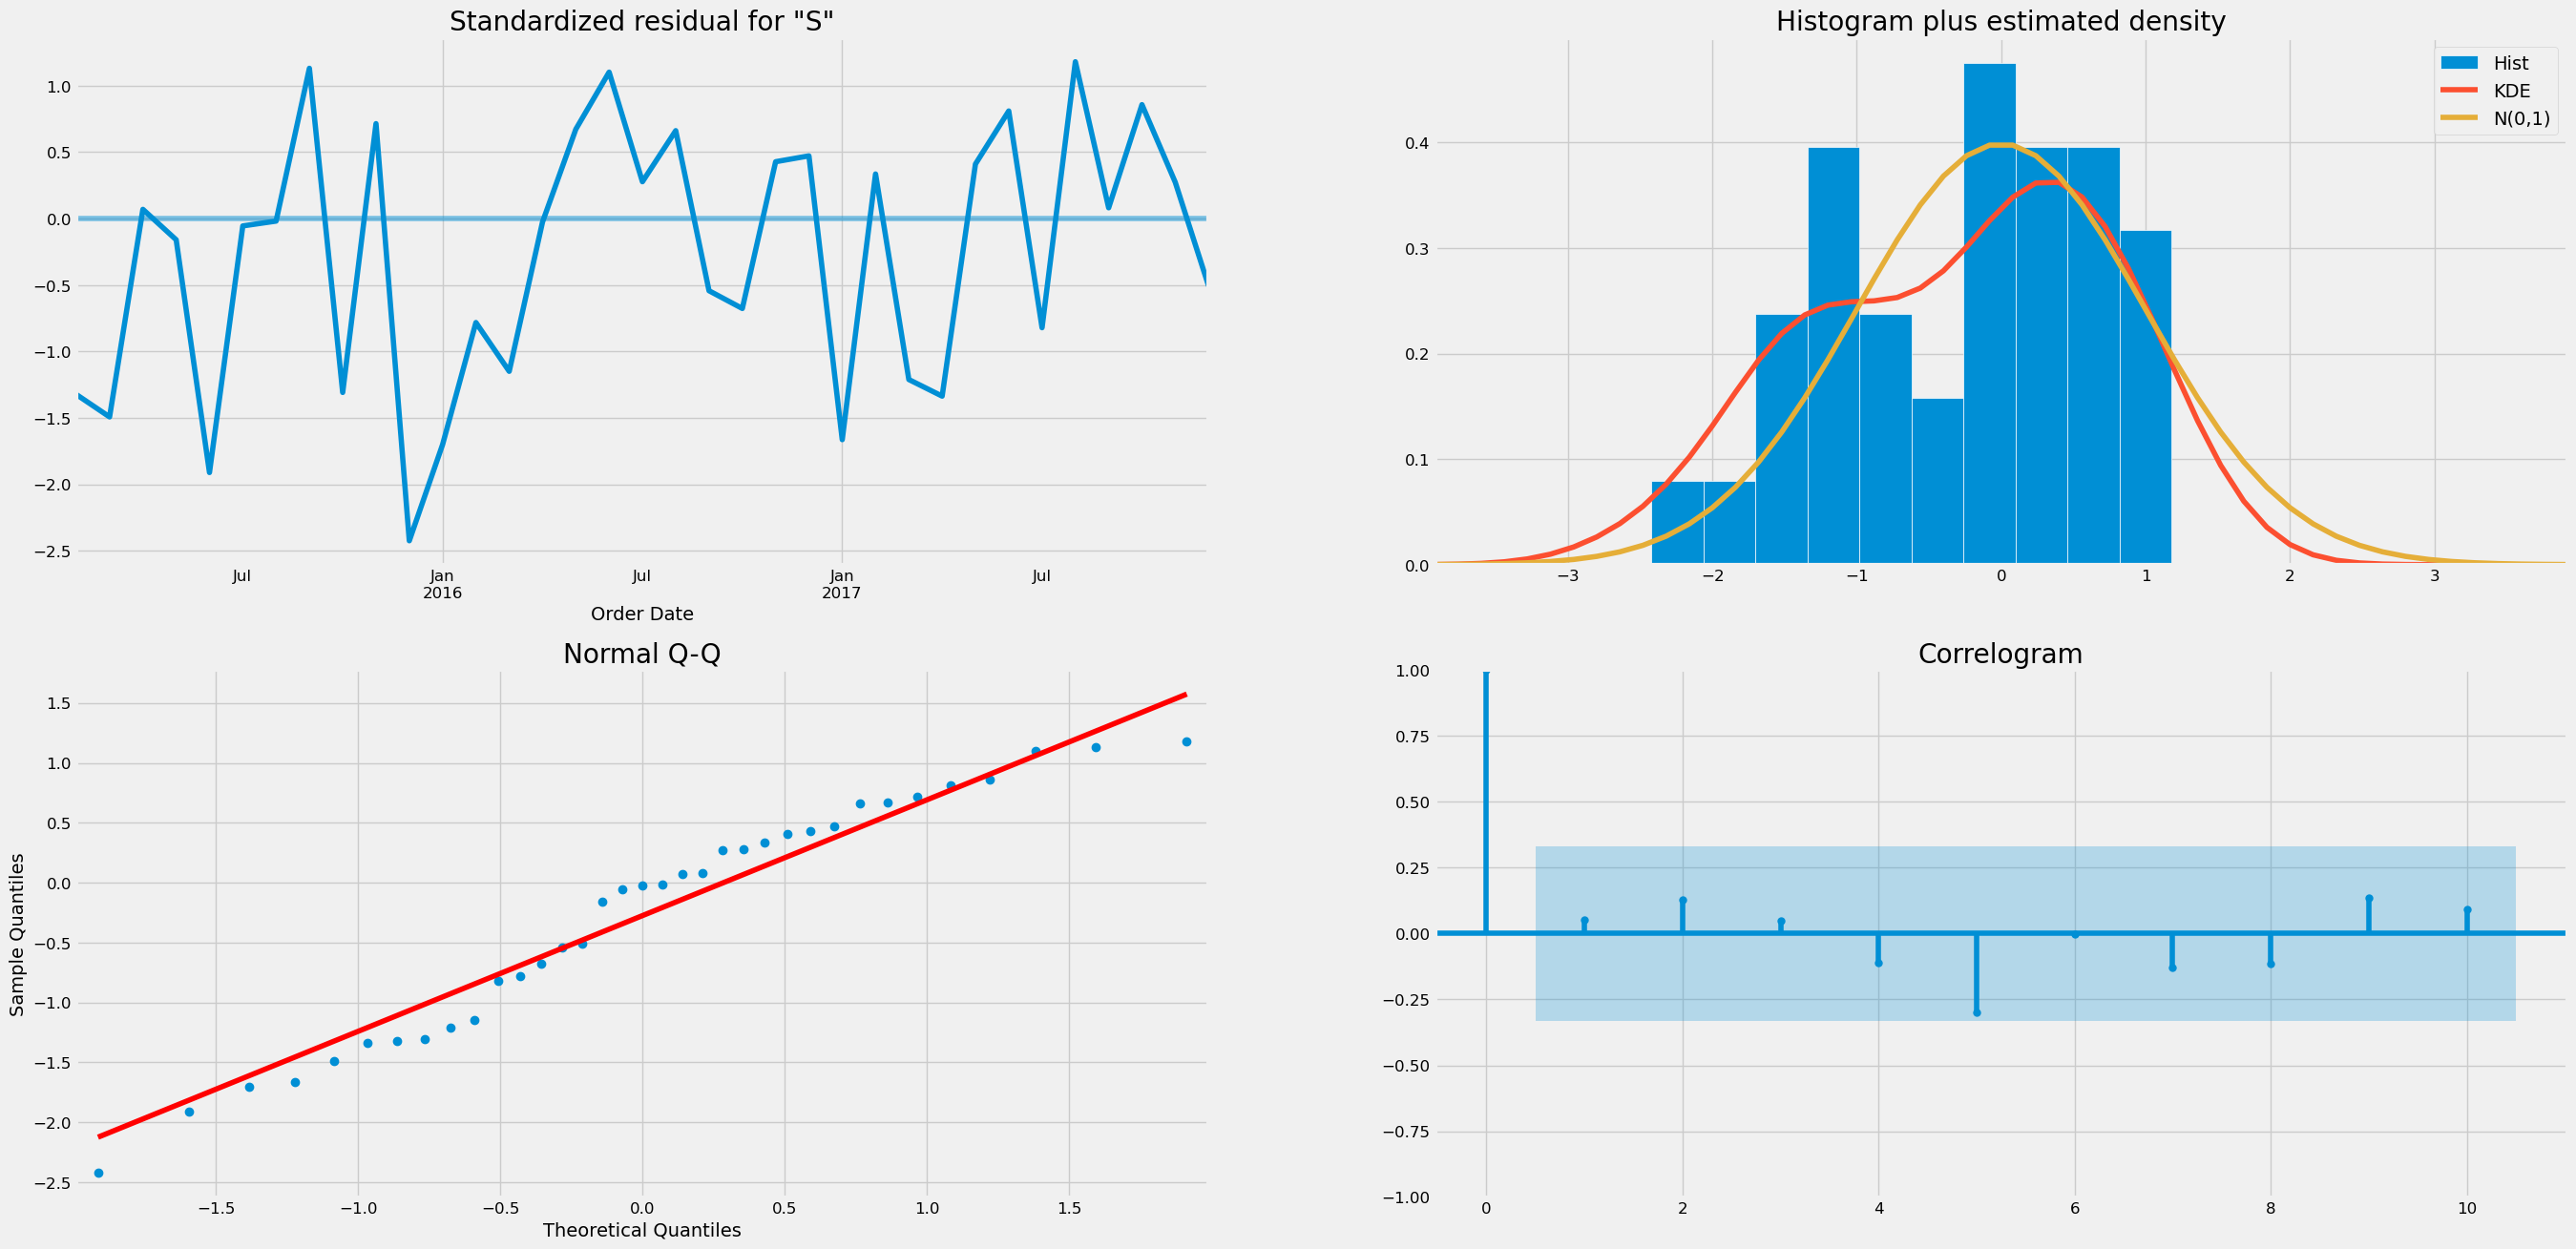

In [14]:
results.plot_diagnostics(figsize=(30,15))
plt.show()

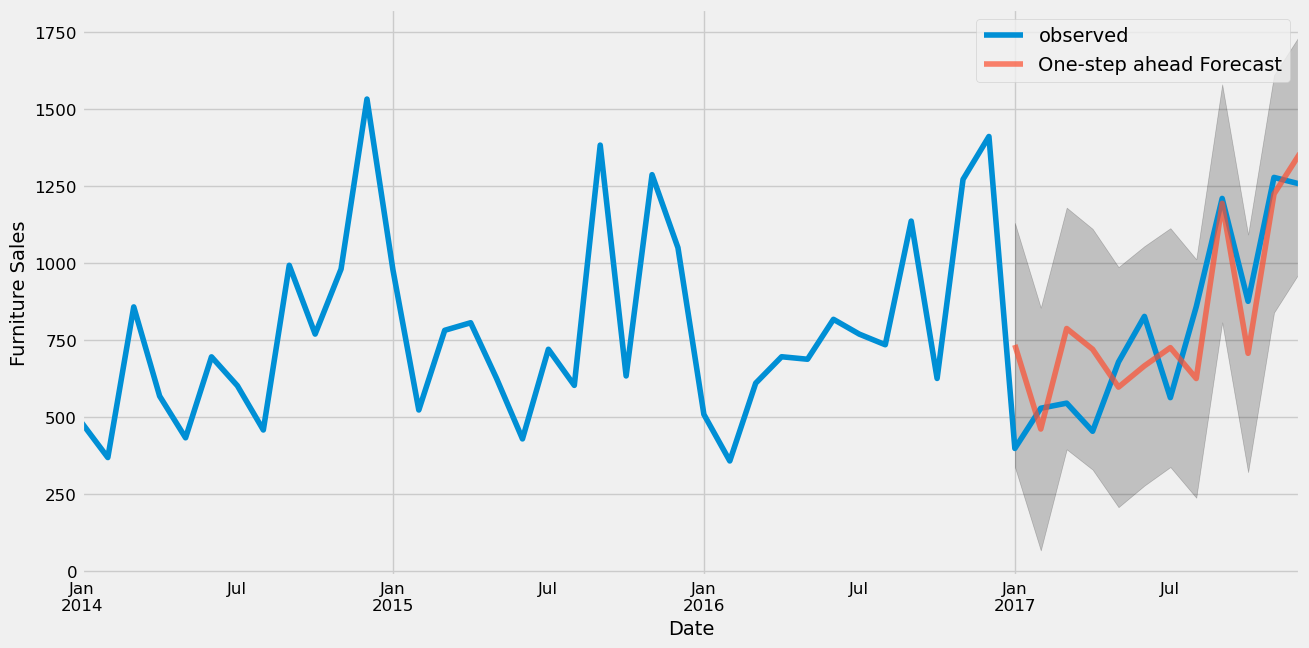

In [15]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'),dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',alpha=.7,figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [16]:
y_forecasted = pred.predicted_mean
y_recorded_truth = y['2017-01-01':]

mse = ((y_forecasted - y_recorded_truth)**2).mean()
print('THE MSE OF FORECAST IS {}'.format(round(mse,2)))

THE MSE OF FORECAST IS 33514.14


In [17]:
import numpy as np
print('THE RMSE OF FORECAST IS {}'.format(round(np.sqrt(mse),2)))

THE RMSE OF FORECAST IS 183.07


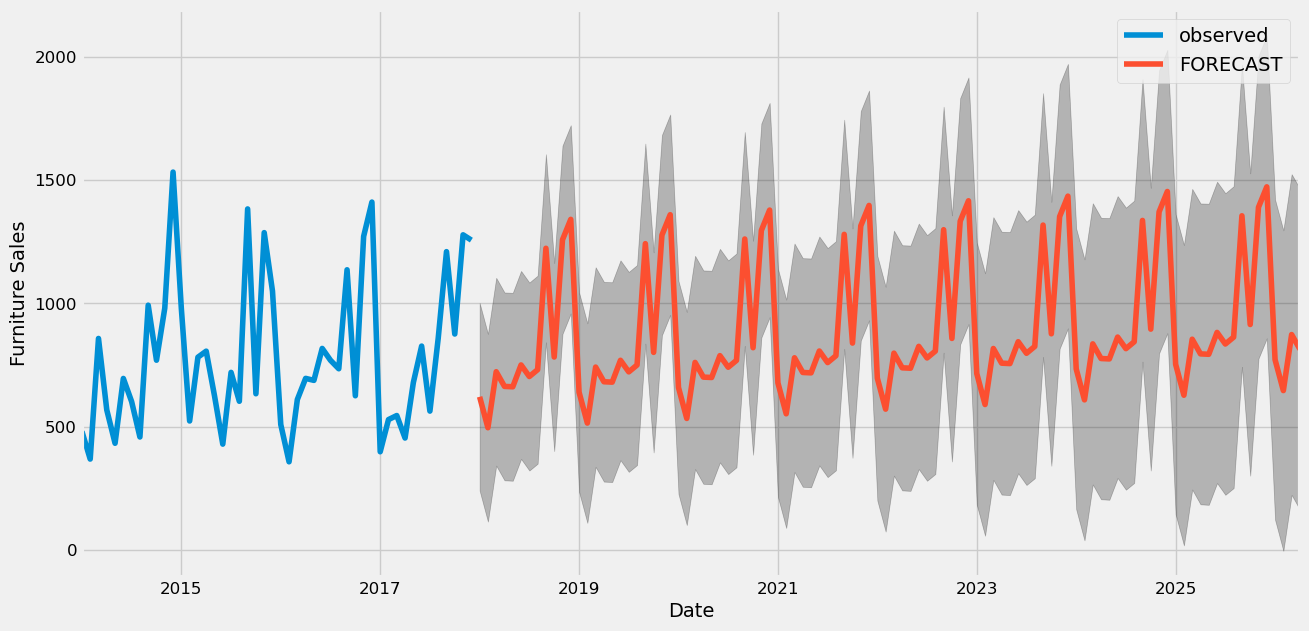

In [18]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='FORECAST')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [19]:
office = df.loc[df['Category'] == 'Office Supplies']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
       'Discount', 'Profit']
office.drop(cols, axis=1, inplace=True)
office = office.sort_values('Order Date')

office.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [20]:
office = office.groupby('Order Date')['Sales'].sum().reset_index()

In [21]:
office = office.set_index('Order Date')

In [22]:
y_furniture = y
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index,'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date':y_office.index,'Sales':y_office.values})

In [23]:
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x':'furniture_sales','Sales_y':'office_sales'},inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


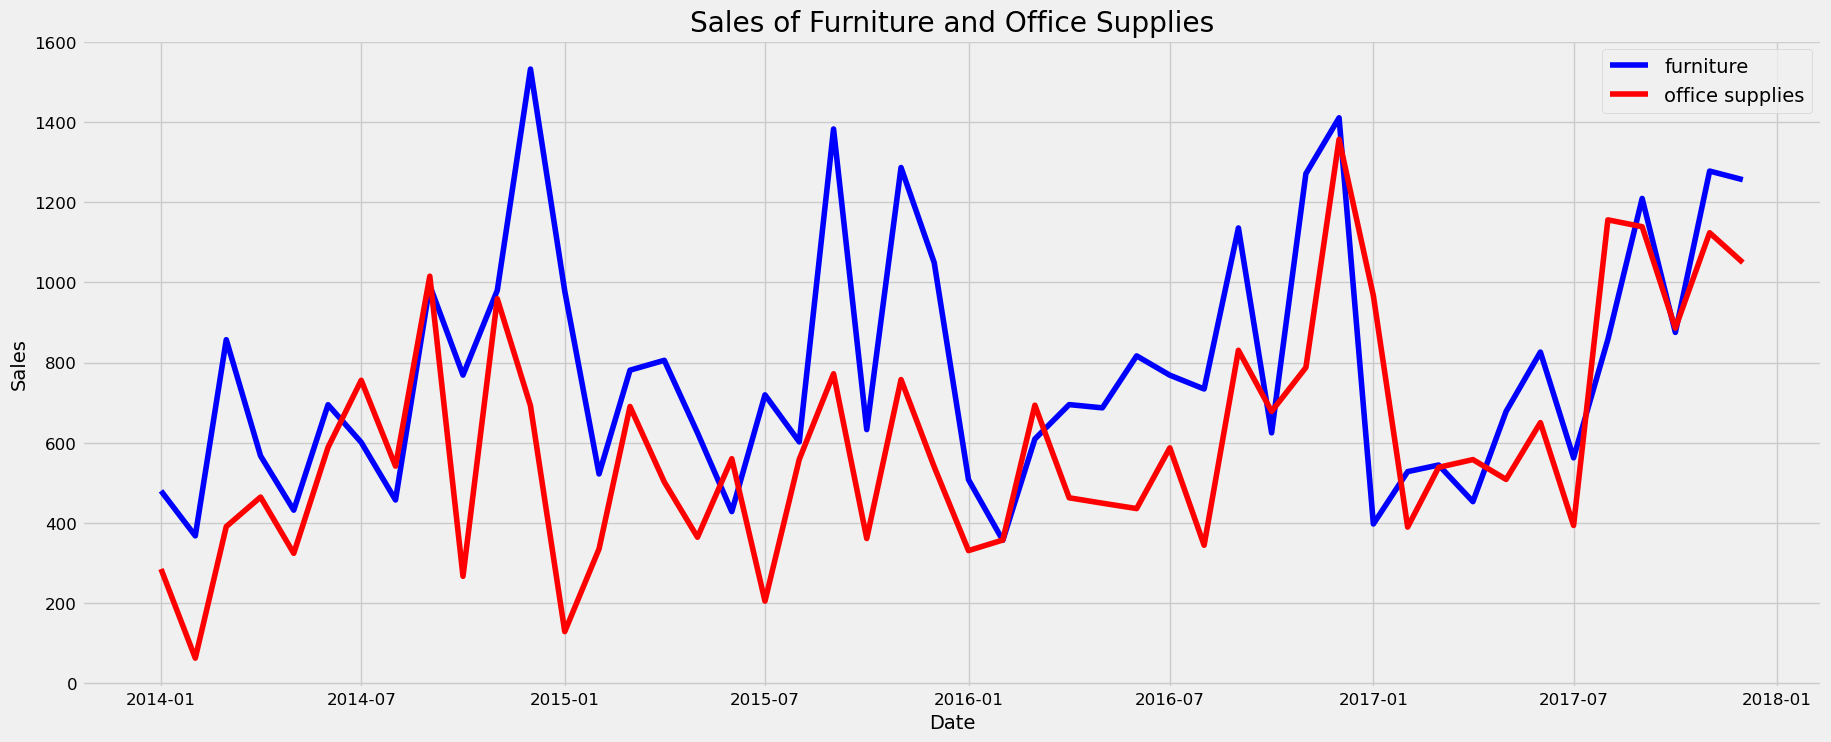

In [24]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'],
        store['furniture_sales'],'b-',label='furniture')
plt.plot(store['Order Date'],
        store['office_sales'],'r-',label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of Furniture and Office Supplies')
plt.legend()

23:36:10 - cmdstanpy - INFO - Chain [1] start processing
23:36:10 - cmdstanpy - INFO - Chain [1] done processing
23:36:10 - cmdstanpy - INFO - Chain [1] start processing
23:36:10 - cmdstanpy - INFO - Chain [1] done processing


Text(0.5, 1.0, 'Furniture Sales')

<Figure size 1800x600 with 0 Axes>

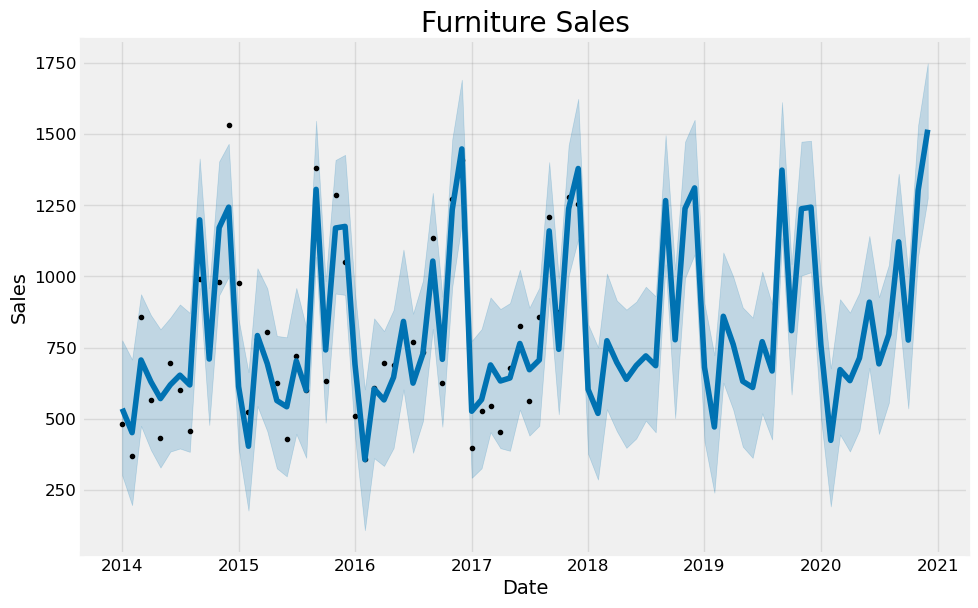

In [25]:
from prophet import Prophet

furniture = furniture.rename(columns={'Order Date':'ds','Sales':'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

office = office.rename(columns={'Order Date':'ds','Sales':'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

furniture_forecast = furniture_model.make_future_dataframe(periods = 36,freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

office_forecast = office_model.make_future_dataframe(periods = 36,freq='MS')
office_forecast = office_model.predict(office_forecast)

plt.figure(figsize=(18,6))
furniture_model.plot(furniture_forecast,xlabel='Date',ylabel='Sales')
plt.title('Furniture Sales')

Text(0.5, 1.0, 'Office Supplies Sales')

<Figure size 1800x600 with 0 Axes>

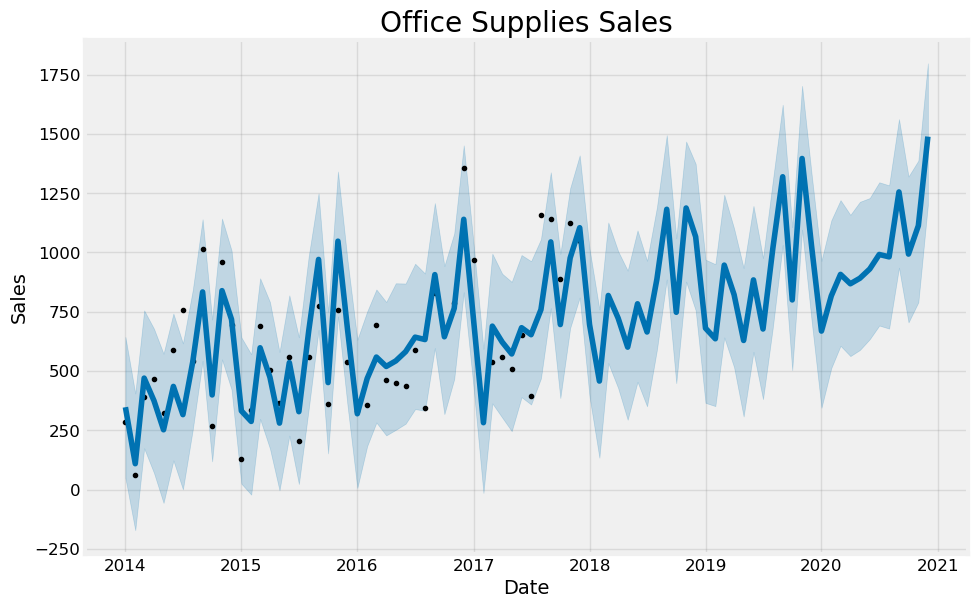

In [26]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast,xlabel='Date',ylabel='Sales')
plt.title('Office Supplies Sales')

In [27]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]

merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names

forecast = pd.merge(merge_furniture_forecast,merge_office_forecast,how='inner',left_on='furniture_ds',right_on = 'office_ds')

forecast = forecast.rename(columns={'furniture_ds':'Date'}).drop('office_ds',axis=1)
forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.058109,300.514496,775.640732,726.058109,726.058109,-190.686099,-190.686099,-190.686099,-190.686099,...,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,-140.041115,0.0,0.0,0.0,347.489370
1,2014-02-01,727.494421,196.380882,708.138326,727.494421,727.494421,-276.379157,-276.379157,-276.379157,-276.379157,...,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,-385.677761,0.0,0.0,0.0,109.240405
2,2014-03-01,728.791734,474.977854,937.487037,728.791734,728.791734,-22.388253,-22.388253,-22.388253,-22.388253,...,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,-31.378526,0.0,0.0,0.0,470.212385
3,2014-04-01,730.228046,390.227174,864.236482,730.228046,730.228046,-100.140909,-100.140909,-100.140909,-100.140909,...,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,-134.290665,0.0,0.0,0.0,374.687928
4,2014-05-01,731.618025,328.376577,814.246191,731.618025,731.618025,-160.818882,-160.818882,-160.818882,-160.818882,...,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,-263.823552,0.0,0.0,0.0,252.304409


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Furniture vs. Office Sales Trend')

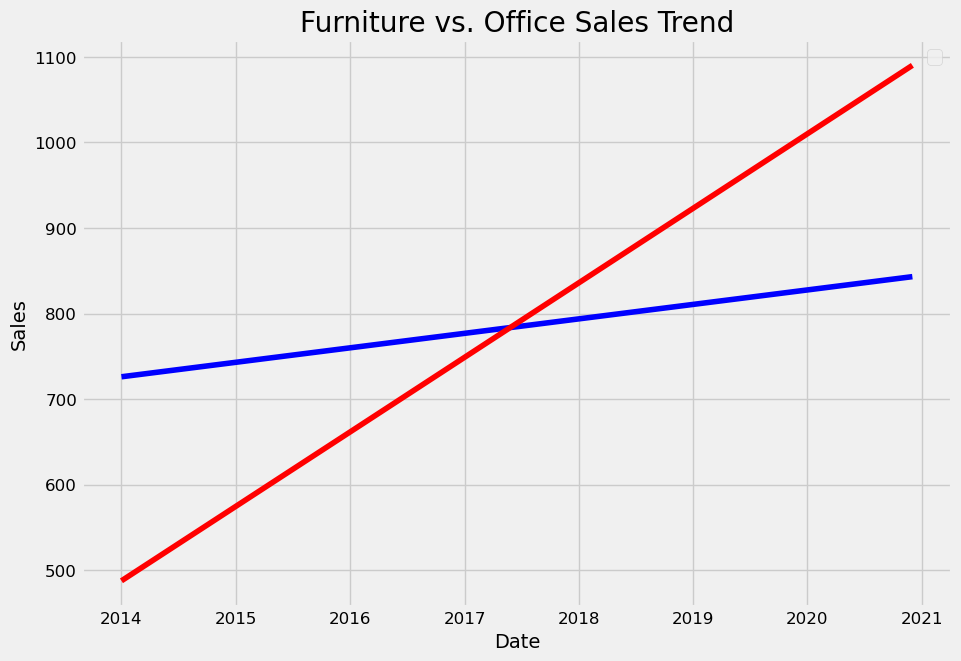

In [28]:
plt.figure(figsize=(10,7))
plt.plot(forecast['Date'],forecast['furniture_trend'],'b-')
plt.plot(forecast['Date'],forecast['office_trend'],'r-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs. Office Sales Trend')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Furniture vs. Office Sales Estimate')

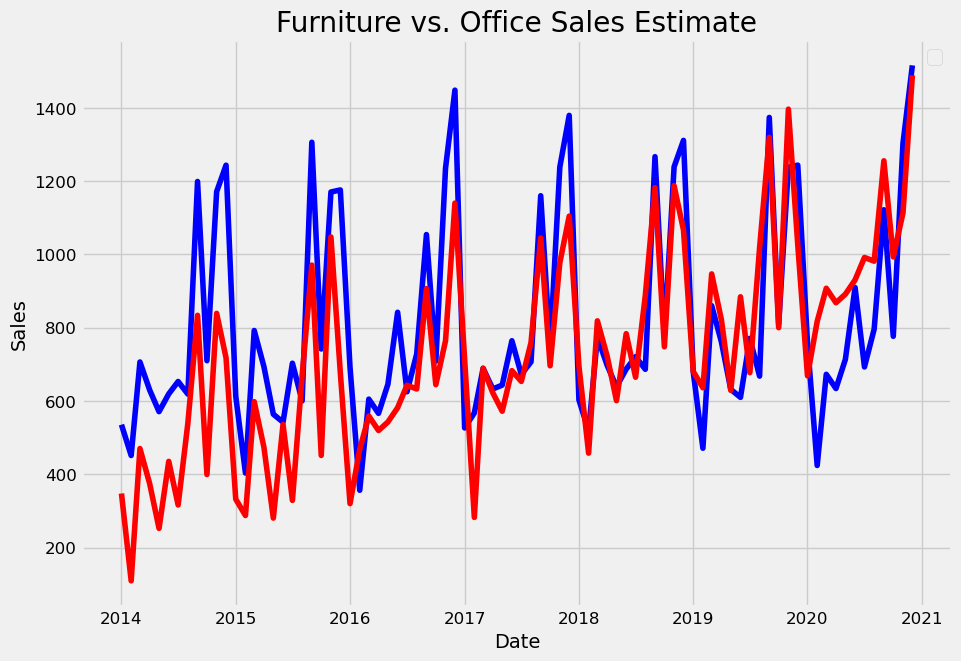

In [29]:
plt.figure(figsize=(10,7))
plt.plot(forecast['Date'],forecast['furniture_yhat'],'b-')
plt.plot(forecast['Date'],forecast['office_yhat'],'r-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs. Office Sales Estimate')

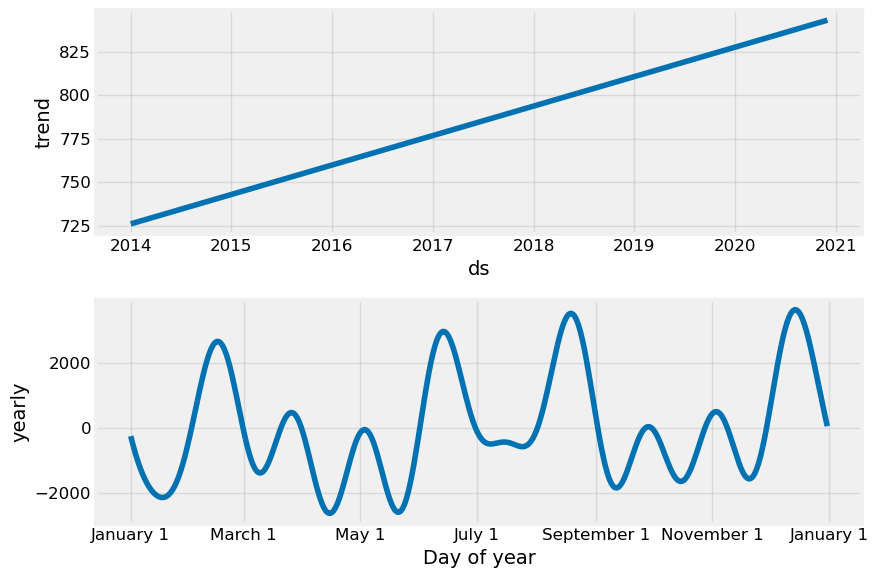

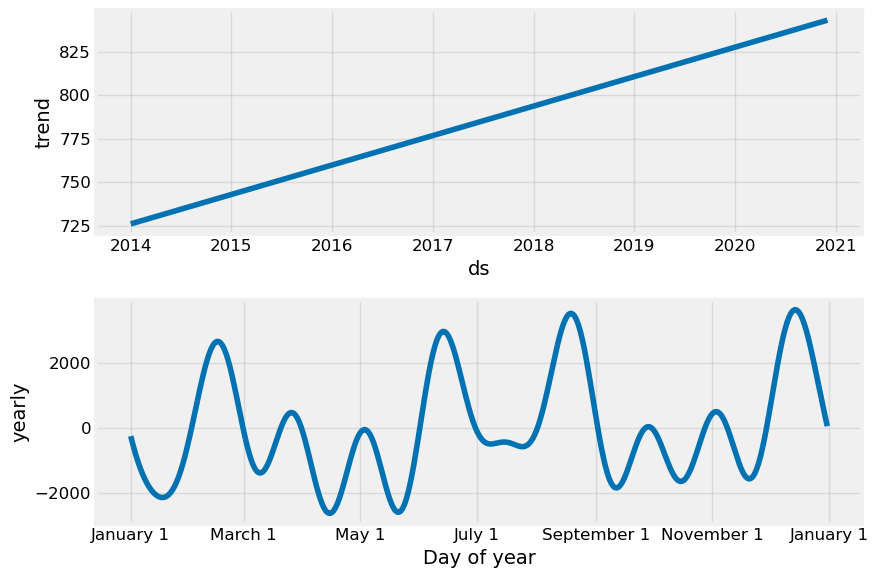

In [30]:
furniture_model.plot_components(furniture_forecast)

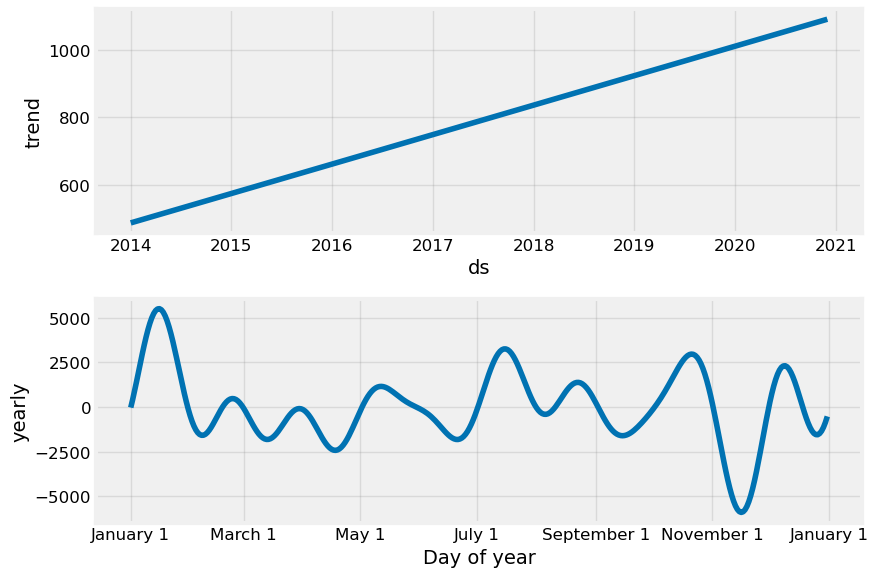

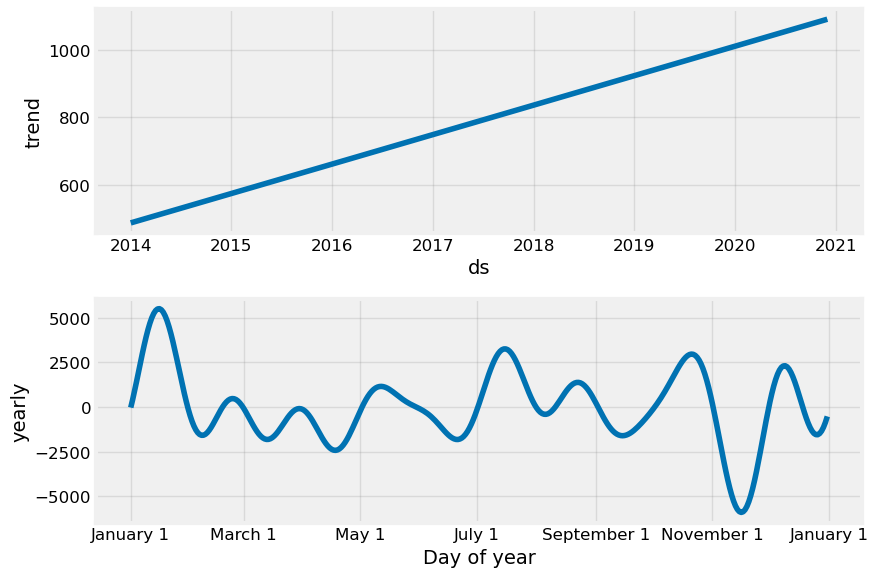

In [31]:
office_model.plot_components(office_forecast)